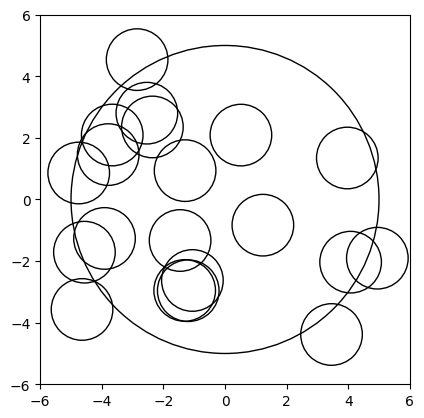

In [1]:
import matplotlib.pyplot as plt
import numpy as np

R, n = 5, 20
x, y = np.random.uniform(-R, R, (2, n))
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.add_artist(plt.Circle((0, 0), R, fill=False))
for xi, yi in zip(x, y):
    ax.add_artist(plt.Circle((xi, yi), 1, fill=False))
ax.set_xlim(-R-1, R+1)
ax.set_ylim(-R-1, R+1)
plt.show()

# Circle Packing Problem

We consider the problem of packing $n$ unit circles into a circular container with fixed radius $R$, such that all circles are within the container and do not overlap with each other.

## Formal Problem Statement

We use a Cartesian coordinate system with its origin at the center of the container. The coordinate of the center of circle $i$ is denoted by $(x_i, y_i)$, where $i \in \{1, 2, ..., n\}$. Any layout configuration is denoted by $X = (x_1, y_1, x_2, y_2, ..., x_n, y_n)$.

Our goal is to find a packing pattern of $n$ circles without overlapping, i.e., to find $(x_i, y_i)$, $i \in \{1, 2, ..., n\}$, such that:

$$\sqrt{x_i^2 + y_i^2} + 1 \leq R$$
$$\sqrt{(x_i - x_j)^2 + (y_i - y_j)^2} \geq 2$$

where $i, j \in \{1, 2, ..., n\}$, $i \neq j$. The first constraint ensures that no circle intersects with the container, and the second constraint prevents overlap between circles.

## The General Quasi-physical Model

Researchers have developed a quasi-physical model to address this continuous optimization problem. The container is regarded as a rigid hollow item (item "0") fixed at the origin, and each circle $i$ as a movable elastic circular item.

### Definition 1: Overlap Depth

There are two types of overlap:

1. Circle-circle overlap depth:
   $$d_{ij} = \max\left(2 - \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}, 0\right)$$
   where $i \neq j$.

2. Circle-container overlap depth:
   $$d_{0i} = \max\left(\sqrt{x_i^2 + y_i^2} + 1 - R, 0\right)$$

### Definition 2: Elastic Potential Energy

The elastic potential energy is proportional to the square of the overlap depth.

- Potential energy of circle $i$: $U_i = \sum_{j=0, j\neq i}^n d_{ij}^2$
- Total potential energy: $U(X) = \sum_{i=1}^n U_i$

The total energy $U \geq 0$ for any layout configuration, with $U = 0$ if and only if $X$ is a feasible layout (i.e., $U$ is a global minimum potential). For a fixed $R$, we minimize $U$ as the objective function to find a feasible solution.

In [2]:
np.__version__

'1.26.4'

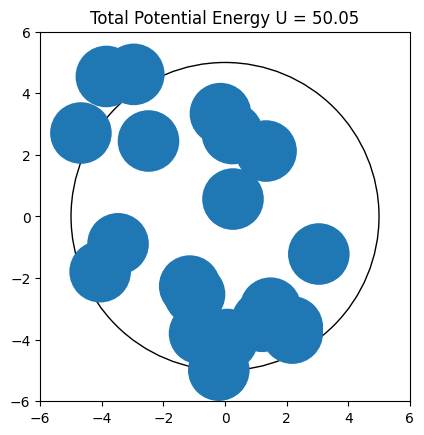

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def circle_circle_overlap(x1, y1, x2, y2):
    return max(2 - np.sqrt((x1 - x2)**2 + (y1 - y2)**2), 0)

def circle_container_overlap(x, y, R):
    return max(np.sqrt(x**2 + y**2) + 1 - R, 0)

def calculate_U(x, y, R):
    n = len(x)
    U = 0
    for i in range(n):
        Ui = circle_container_overlap(x[i], y[i], R)**2
        for j in range(n):
            if i != j:
                Ui += circle_circle_overlap(x[i], y[i], x[j], y[j])**2
        U += Ui
    return U

R, n = 5, 20
x, y = np.random.uniform(-R, R, (2, n))

U = calculate_U(x, y, R)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.add_artist(plt.Circle((0, 0), R, fill=False))
for xi, yi in zip(x, y):
    ax.add_artist(plt.Circle((xi, yi), 1))
ax.set_xlim(-R-1, R+1)
ax.set_ylim(-R-1, R+1)
ax.set_title(f'Total Potential Energy U = {U:.2f}')
plt.show()

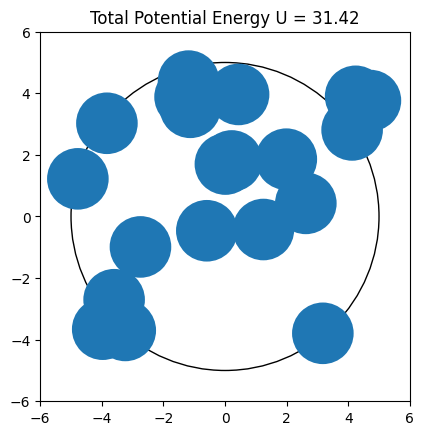

In [6]:
import torch
import matplotlib.pyplot as plt

def circle_circle_overlap(x1, y1, x2, y2):
    return torch.clamp(2 - torch.sqrt((x1 - x2)**2 + (y1 - y2)**2), min=0)

def circle_container_overlap(x, y, R):
    return torch.clamp(torch.sqrt(x**2 + y**2) + 1 - R, min=0)

def calculate_U(positions, R):
    n = positions.shape[0]
    distances = torch.cdist(positions, positions)
    circle_circle_overlaps = torch.clamp(2 - distances, min=0)**2
    circle_circle_overlaps.fill_diagonal_(0)
    
    container_distances = torch.sqrt(torch.sum(positions**2, dim=1)) + 1 - R
    circle_container_overlaps = torch.clamp(container_distances, min=0)**2
    
    U = torch.sum(circle_circle_overlaps) / 2 + torch.sum(circle_container_overlaps)
    return U

R, n = 5, 20
positions = torch.rand(n, 2) * 2 * R - R
positions.requires_grad = True

U = calculate_U(positions, R)

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.add_artist(plt.Circle((0, 0), R, fill=False))
for xi, yi in positions.detach().cpu():
    ax.add_artist(plt.Circle((xi, yi), 1))
ax.set_xlim(-R-1, R+1)
ax.set_ylim(-R-1, R+1)
ax.set_title(f'Total Potential Energy U = {U.item():.2f}')
plt.show()

Iteration 0, U = 24.4012
Iteration 100, U = 4.5982
Iteration 200, U = 1.6822
Iteration 300, U = 0.6203
Iteration 400, U = 0.3045
Iteration 500, U = 0.1333
Iteration 600, U = 0.0664
Iteration 700, U = 0.0556
Iteration 800, U = 0.0546
Iteration 900, U = 0.0545


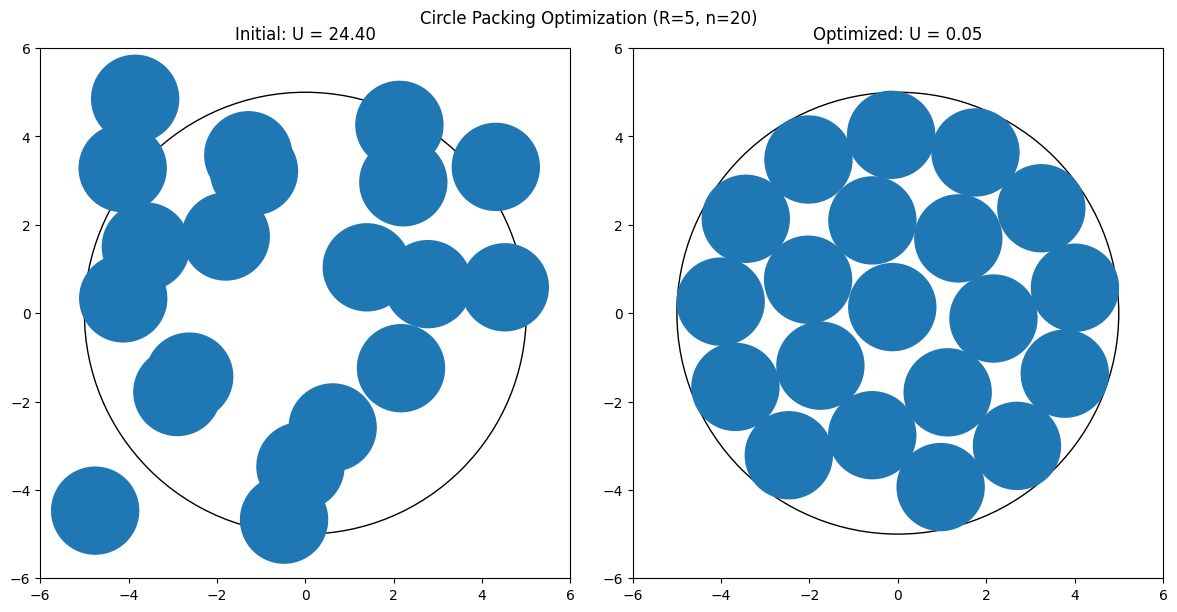

In [9]:
import torch
import matplotlib.pyplot as plt

def calculate_U(positions, R):
    n = positions.shape[0]
    distances = torch.cdist(positions, positions)
    circle_circle_overlaps = torch.clamp(2 - distances, min=0)**2
    circle_circle_overlaps.fill_diagonal_(0)
    
    container_distances = torch.sqrt(torch.sum(positions**2, dim=1)) + 1 - R
    circle_container_overlaps = torch.clamp(container_distances, min=0)**2
    
    U = torch.sum(circle_circle_overlaps) / 2 + torch.sum(circle_container_overlaps)
    return U

def optimize_packing(positions, R, num_iterations=1000, learning_rate=0.01):
    optimizer = torch.optim.Adam([positions], lr=learning_rate)
    
    for i in range(num_iterations):
        optimizer.zero_grad()
        U = calculate_U(positions, R)
        U.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f"Iteration {i}, U = {U.item():.4f}")
    
    return positions, U

R, n = 5, 20
positions = torch.rand(n, 2) * 2 * R - R
initial_positions = positions.clone().detach()
positions.requires_grad = True

initial_U = calculate_U(positions, R)
optimized_positions, final_U = optimize_packing(positions, R)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle(f'Circle Packing Optimization (R={R}, n={n})')

# Initial configuration
ax1.set_aspect('equal')
ax1.add_artist(plt.Circle((0, 0), R, fill=False))
for xi, yi in initial_positions:
    ax1.add_artist(plt.Circle((xi, yi), 1))
ax1.set_xlim(-R-1, R+1)
ax1.set_ylim(-R-1, R+1)
ax1.set_title(f'Initial: U = {initial_U.item():.2f}')

# Optimized configuration
ax2.set_aspect('equal')
ax2.add_artist(plt.Circle((0, 0), R, fill=False))
for xi, yi in optimized_positions.detach():
    ax2.add_artist(plt.Circle((xi, yi), 1))
ax2.set_xlim(-R-1, R+1)
ax2.set_ylim(-R-1, R+1)
ax2.set_title(f'Optimized: U = {final_U.item():.2f}')

plt.tight_layout()
plt.show()